In [1]:
"""
First insights:

* If an input is trained, it will stay stable, even if it receives less inputs in a second run
* If an input was trained less in a first run, it will strenghten its connections later if its stimuated more often then
* But in this case it will take much more time, since only few spikes are available which takes some time to build up
* If both inputs are trained strongly, further activating patterns have not really any impact anymore
-> An input aquires a specific amount of neurons and stably saturates
-> If it's relatively weak in the beginning it can still become saturates, but then it takes longer
"""
print('')

In [2]:
import os
import sys

path = '/home/seq/pelenet'
sys.path.append(path)
os.chdir(path)

In [3]:
# Allow reload of objects
%load_ext autoreload
%autoreload

from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment
from pelenet.experiments.assembliesoutput import AssemblyOutputExperiment

# Official modules
import numpy as np
from scipy import sparse
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time
from copy import deepcopy

In [4]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 40, #20,  # Number of trials
    'stepsPerTrial': 40, #50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35, #35 # Number of connections per neuron
    # Noise
    'isNoise': True,
    'onlyExcitatory': True,  # Noisy input is only excitatory
    'noiseMaxWeight': 120, #120,
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1200,  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningEpoch': 4,
    'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*x0*y0 - 2^-3*y0*w*w', #'2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*y0 - 2^-3*y0*w*w',
    #'learningRule': '2^-3*x1*y1*x0*y0 - 2^-3*y0*w*w',
    #'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-3*y0*w*w',
    # Input
    'inputIsVary': True,
    'inputOffset': 10,
    'inputVaryProbs': [0.1, 0.9],
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 20, #30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [5]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [6]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.922

In [7]:
#exp.net.plot.initialExWeightDistribution()

In [8]:
#exp.net.noiseWeights.toarray()[:20,:20]

In [9]:
pars = exp.net.p

In [10]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:38267
INFO:DRV:      Host server up..............Done 0.20s
INFO:DRV:      Encoding axons/synapses.....Done 0.44s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1618823230.5568438
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1618823230.5568438/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1618823230.5568438/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 181 to 190
INFO:HST:  chip=0 cpu=0 Reset functional state at 190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 241 to 250
INFO:HST:  chip=0 cpu=0 Reset functional state at 250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 301 to 31

INFO:HST:  chip=0 cpu=0 Reset functional state at 2230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2281 to 2290
INFO:HST:  chip=0 cpu=0 Reset functional state at 2290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2341 to 2350
INFO:HST:  chip=0 cpu=0 Reset functional state at 2350
INFO:DRV:      Executing...................Done 56.96s
INFO:DRV:      Processing timeseries.......Done 2.91s
INFO:DRV:  Executor: 2400 timesteps........Done 61.19s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


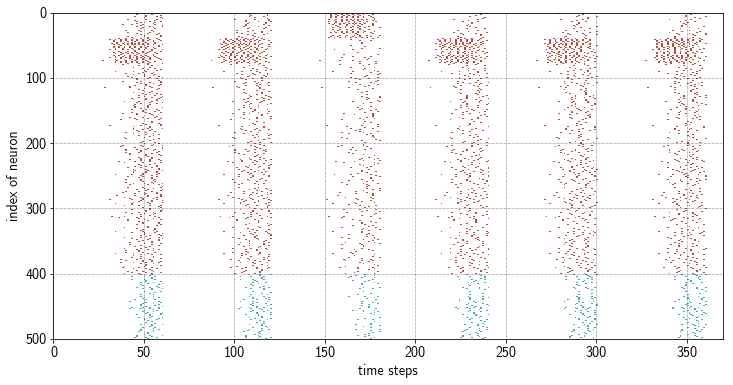

In [11]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6), fr=0, to=370)

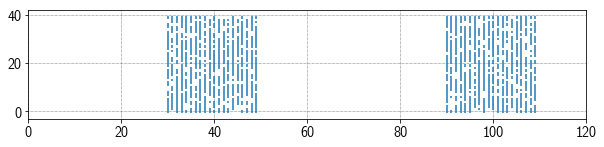

In [12]:
plt.figure(figsize=(10,2))
plt.xlim((0,120))
pl = plt.eventplot(exp.net.inputSpikes)

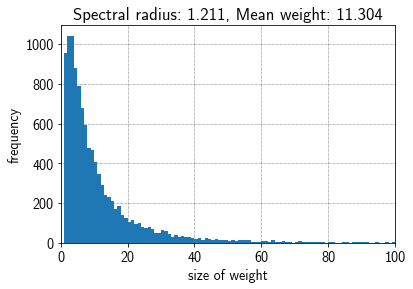

In [13]:
exp.net.plot.initialExWeightDistribution(figsize=(6,4), xlim=(0,100))

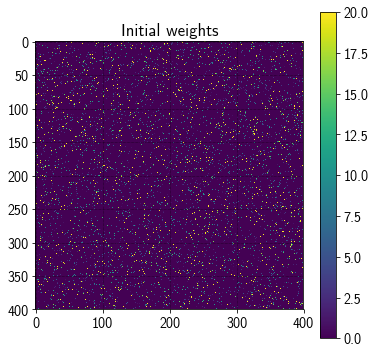

In [14]:
# Weight matrix before learning
exp.net.plot.initialExWeightMatrix()

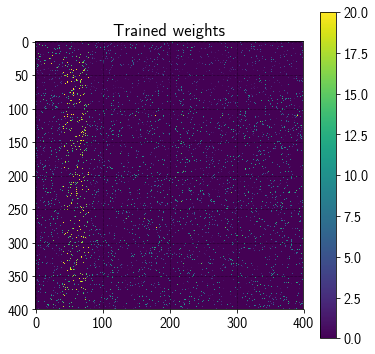

In [15]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

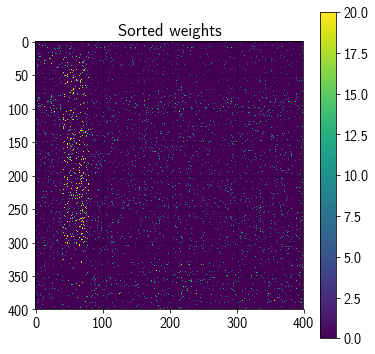

In [16]:
# Sorted weight matrix after learning
expSupportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex[-1])
exp.net.plot.weightsSortedBySupport(expSupportMask, exp.net.trainedWeightsExex[-1])

In [17]:
nCs = exp.net.p.inputNumTargetNeurons
nEx = exp.net.p.reservoirExSize
nC = exp.net.p.inputVaryNum

In [18]:
nCs, nEx, nC

(40, 400, 2)

In [19]:
#weightsExEx = exp.net.trainedWeightsExex[-1]
#np.save('weightsExEx', weightsExEx)

In [20]:
inputs = utils.getInputLetterList(exp.net.inputTrials)

In [21]:
supportMasks = utils.getSupportMasksForAllTrials(exp.net.initialWeights.exex, exp.net.trainedWeightsExex)

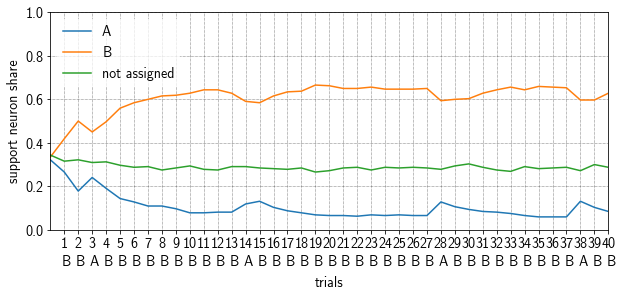

In [22]:
exp.net.plot.supportShare(supportMasks)

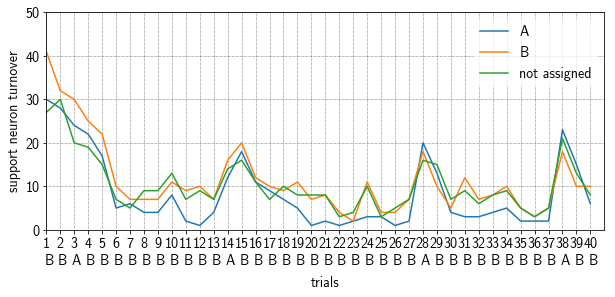

In [23]:
exp.net.plot.supportTurnover(supportMasks)

In [24]:
# Meta parameters
nAssemblies = exp.net.p.inputVaryNum
assemblyIndex = 1 #0
nTrain = 500
nTest = 100
nTrials = nAssemblies * (nTrain + nTest)

# New parameters
newParameters = {
    **parameters,
    'trials': nTrials,
    # Noise
    'isNoise': False,
    # Input
    'inputIsVary': False,
    'inputOffset': 0,
    'inputWeightDistribution': 'max',
    # Neuron
    'thresholdMant': 500,
    # Plasticity
    'isLearningRule': False,
    # Probes
    'isWeightProbe': False
}

In [25]:
# Initilizes a second experiment
exp2 = AssemblyOutputExperiment(name='assemblies-output', parameters=newParameters)

In [26]:
# Get weights from previous experiment
weights = deepcopy(exp.net.initialWeights)
weights.exex = exp.net.trainedWeightsExex[-1]
#weights.exex = sparse.csr_matrix(np.zeros((400,400)))

# Define inputs
#inputDataset = exp2.loadYinYangAsInputs(nAssemblies=nAssemblies, nTrain=nTrain, nTest=nTest)
inputDataset = exp2.loadMnistAsInputs(nAssemblies=nAssemblies, nTrain=nTrain, nTest=nTest)

# Build experiment
exp2.build(
    supportMask=supportMasks[-1],
    mask=exp.net.initialMasks,
    weights=weights,
    assemblyIndex=assemblyIndex,
    inputSpikeIndices=inputDataset
)

In [27]:
# Run network
exp2.run()

INFO:DRV:  Connecting to 127.0.0.1:41751
INFO:DRV:      Host server up..............Done 0.20s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1618823313.0255213
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1618823313.0255213/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1801 to 1810
INFO:HST:  chip=0 cpu=0 Reset functional state at 1810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1861 to 1870
INFO:HST:  chip=0 cpu=0 Reset functional state at 1870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1921 to 1930
INFO:HST:  chip=0 cpu=0 Reset functional state at 1930
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1981 to 1990
INFO:HST:  chip=0 cpu=0 Reset functional state at 1990
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2041 to 2050
INFO:HST:  chip=0 cpu=0 Reset functional state at 2050
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2101 to 2110
INFO:HST:  chip=0 cpu=0 Reset functional state at 2110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2161 to 2170
INFO:HST:  chip=0 cpu=0 Reset functional state at 2170
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2221 to 2230
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3781 to 3790
INFO:HST:  chip=0 cpu=0 Reset functional state at 3790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3841 to 3850
INFO:HST:  chip=0 cpu=0 Reset functional state at 3850
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3901 to 3910
INFO:HST:  chip=0 cpu=0 Reset functional state at 3910
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3961 to 3970
INFO:HST:  chip=0 cpu=0 Reset functional state at 3970
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4021 to 4030
INFO:HST:  chip=0 cpu=0 Reset functional state at 4030
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4081 to 4090
INFO:HST:  chip=0 cpu=0 Reset functional state at 4090
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4141 to 4150
INFO:HST:  chip=0 cpu=0 Reset functional state at 4150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4201 to 4210
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5761 to 5770
INFO:HST:  chip=0 cpu=0 Reset functional state at 5770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5821 to 5830
INFO:HST:  chip=0 cpu=0 Reset functional state at 5830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5881 to 5890
INFO:HST:  chip=0 cpu=0 Reset functional state at 5890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5941 to 5950
INFO:HST:  chip=0 cpu=0 Reset functional state at 5950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6001 to 6010
INFO:HST:  chip=0 cpu=0 Reset functional state at 6010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6061 to 6070
INFO:HST:  chip=0 cpu=0 Reset functional state at 6070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6121 to 6130
INFO:HST:  chip=0 cpu=0 Reset functional state at 6130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 6181 to 6190
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7741 to 7750
INFO:HST:  chip=0 cpu=0 Reset functional state at 7750
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7801 to 7810
INFO:HST:  chip=0 cpu=0 Reset functional state at 7810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7861 to 7870
INFO:HST:  chip=0 cpu=0 Reset functional state at 7870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7921 to 7930
INFO:HST:  chip=0 cpu=0 Reset functional state at 7930
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 7981 to 7990
INFO:HST:  chip=0 cpu=0 Reset functional state at 7990
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8041 to 8050
INFO:HST:  chip=0 cpu=0 Reset functional state at 8050
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8101 to 8110
INFO:HST:  chip=0 cpu=0 Reset functional state at 8110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 8161 to 8170
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9721 to 9730
INFO:HST:  chip=0 cpu=0 Reset functional state at 9730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9781 to 9790
INFO:HST:  chip=0 cpu=0 Reset functional state at 9790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9841 to 9850
INFO:HST:  chip=0 cpu=0 Reset functional state at 9850
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9901 to 9910
INFO:HST:  chip=0 cpu=0 Reset functional state at 9910
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 9961 to 9970
INFO:HST:  chip=0 cpu=0 Reset functional state at 9970
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10021 to 10030
INFO:HST:  chip=0 cpu=0 Reset functional state at 10030
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10081 to 10090
INFO:HST:  chip=0 cpu=0 Reset functional state at 10090
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 10141 to 10150
INFO:HST:  chip

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11701 to 11710
INFO:HST:  chip=0 cpu=0 Reset functional state at 11710
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11761 to 11770
INFO:HST:  chip=0 cpu=0 Reset functional state at 11770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11821 to 11830
INFO:HST:  chip=0 cpu=0 Reset functional state at 11830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11881 to 11890
INFO:HST:  chip=0 cpu=0 Reset functional state at 11890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 11941 to 11950
INFO:HST:  chip=0 cpu=0 Reset functional state at 11950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12001 to 12010
INFO:HST:  chip=0 cpu=0 Reset functional state at 12010
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12061 to 12070
INFO:HST:  chip=0 cpu=0 Reset functional state at 12070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 12121 to 12130


INFO:HST:  chip=0 cpu=0 Reset functional state at 13630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13681 to 13690
INFO:HST:  chip=0 cpu=0 Reset functional state at 13690
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13741 to 13750
INFO:HST:  chip=0 cpu=0 Reset functional state at 13750
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13801 to 13810
INFO:HST:  chip=0 cpu=0 Reset functional state at 13810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13861 to 13870
INFO:HST:  chip=0 cpu=0 Reset functional state at 13870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13921 to 13930
INFO:HST:  chip=0 cpu=0 Reset functional state at 13930
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 13981 to 13990
INFO:HST:  chip=0 cpu=0 Reset functional state at 13990
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 14041 to 14050
INFO:HST:  chip=0 cpu=0 Reset functional state at 14050
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 15610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15661 to 15670
INFO:HST:  chip=0 cpu=0 Reset functional state at 15670
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15721 to 15730
INFO:HST:  chip=0 cpu=0 Reset functional state at 15730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15781 to 15790
INFO:HST:  chip=0 cpu=0 Reset functional state at 15790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15841 to 15850
INFO:HST:  chip=0 cpu=0 Reset functional state at 15850
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15901 to 15910
INFO:HST:  chip=0 cpu=0 Reset functional state at 15910
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 15961 to 15970
INFO:HST:  chip=0 cpu=0 Reset functional state at 15970
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16021 to 16030
INFO:HST:  chip=0 cpu=0 Reset functional state at 16030
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 17590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17641 to 17650
INFO:HST:  chip=0 cpu=0 Reset functional state at 17650
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17701 to 17710
INFO:HST:  chip=0 cpu=0 Reset functional state at 17710
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17761 to 17770
INFO:HST:  chip=0 cpu=0 Reset functional state at 17770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17821 to 17830
INFO:HST:  chip=0 cpu=0 Reset functional state at 17830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17881 to 17890
INFO:HST:  chip=0 cpu=0 Reset functional state at 17890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17941 to 17950
INFO:HST:  chip=0 cpu=0 Reset functional state at 17950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 18001 to 18010
INFO:HST:  chip=0 cpu=0 Reset functional state at 18010
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 19570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19621 to 19630
INFO:HST:  chip=0 cpu=0 Reset functional state at 19630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19681 to 19690
INFO:HST:  chip=0 cpu=0 Reset functional state at 19690
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19741 to 19750
INFO:HST:  chip=0 cpu=0 Reset functional state at 19750
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19801 to 19810
INFO:HST:  chip=0 cpu=0 Reset functional state at 19810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19861 to 19870
INFO:HST:  chip=0 cpu=0 Reset functional state at 19870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19921 to 19930
INFO:HST:  chip=0 cpu=0 Reset functional state at 19930
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19981 to 19990
INFO:HST:  chip=0 cpu=0 Reset functional state at 19990
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 21550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21601 to 21610
INFO:HST:  chip=0 cpu=0 Reset functional state at 21610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21661 to 21670
INFO:HST:  chip=0 cpu=0 Reset functional state at 21670
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21721 to 21730
INFO:HST:  chip=0 cpu=0 Reset functional state at 21730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21781 to 21790
INFO:HST:  chip=0 cpu=0 Reset functional state at 21790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21841 to 21850
INFO:HST:  chip=0 cpu=0 Reset functional state at 21850
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21901 to 21910
INFO:HST:  chip=0 cpu=0 Reset functional state at 21910
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 21961 to 21970
INFO:HST:  chip=0 cpu=0 Reset functional state at 21970
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 23530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23581 to 23590
INFO:HST:  chip=0 cpu=0 Reset functional state at 23590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23641 to 23650
INFO:HST:  chip=0 cpu=0 Reset functional state at 23650
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23701 to 23710
INFO:HST:  chip=0 cpu=0 Reset functional state at 23710
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23761 to 23770
INFO:HST:  chip=0 cpu=0 Reset functional state at 23770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23821 to 23830
INFO:HST:  chip=0 cpu=0 Reset functional state at 23830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23881 to 23890
INFO:HST:  chip=0 cpu=0 Reset functional state at 23890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 23941 to 23950
INFO:HST:  chip=0 cpu=0 Reset functional state at 23950
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 25510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25561 to 25570
INFO:HST:  chip=0 cpu=0 Reset functional state at 25570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25621 to 25630
INFO:HST:  chip=0 cpu=0 Reset functional state at 25630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25681 to 25690
INFO:HST:  chip=0 cpu=0 Reset functional state at 25690
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25741 to 25750
INFO:HST:  chip=0 cpu=0 Reset functional state at 25750
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25801 to 25810
INFO:HST:  chip=0 cpu=0 Reset functional state at 25810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25861 to 25870
INFO:HST:  chip=0 cpu=0 Reset functional state at 25870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 25921 to 25930
INFO:HST:  chip=0 cpu=0 Reset functional state at 25930
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 27490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27541 to 27550
INFO:HST:  chip=0 cpu=0 Reset functional state at 27550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27601 to 27610
INFO:HST:  chip=0 cpu=0 Reset functional state at 27610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27661 to 27670
INFO:HST:  chip=0 cpu=0 Reset functional state at 27670
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27721 to 27730
INFO:HST:  chip=0 cpu=0 Reset functional state at 27730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27781 to 27790
INFO:HST:  chip=0 cpu=0 Reset functional state at 27790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27841 to 27850
INFO:HST:  chip=0 cpu=0 Reset functional state at 27850
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 27901 to 27910
INFO:HST:  chip=0 cpu=0 Reset functional state at 27910
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 29470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29521 to 29530
INFO:HST:  chip=0 cpu=0 Reset functional state at 29530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29581 to 29590
INFO:HST:  chip=0 cpu=0 Reset functional state at 29590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29641 to 29650
INFO:HST:  chip=0 cpu=0 Reset functional state at 29650
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29701 to 29710
INFO:HST:  chip=0 cpu=0 Reset functional state at 29710
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29761 to 29770
INFO:HST:  chip=0 cpu=0 Reset functional state at 29770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29821 to 29830
INFO:HST:  chip=0 cpu=0 Reset functional state at 29830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 29881 to 29890
INFO:HST:  chip=0 cpu=0 Reset functional state at 29890
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 31450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31501 to 31510
INFO:HST:  chip=0 cpu=0 Reset functional state at 31510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31561 to 31570
INFO:HST:  chip=0 cpu=0 Reset functional state at 31570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31621 to 31630
INFO:HST:  chip=0 cpu=0 Reset functional state at 31630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31681 to 31690
INFO:HST:  chip=0 cpu=0 Reset functional state at 31690
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31741 to 31750
INFO:HST:  chip=0 cpu=0 Reset functional state at 31750
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31801 to 31810
INFO:HST:  chip=0 cpu=0 Reset functional state at 31810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 31861 to 31870
INFO:HST:  chip=0 cpu=0 Reset functional state at 31870
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 33430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33481 to 33490
INFO:HST:  chip=0 cpu=0 Reset functional state at 33490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33541 to 33550
INFO:HST:  chip=0 cpu=0 Reset functional state at 33550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33601 to 33610
INFO:HST:  chip=0 cpu=0 Reset functional state at 33610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33661 to 33670
INFO:HST:  chip=0 cpu=0 Reset functional state at 33670
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33721 to 33730
INFO:HST:  chip=0 cpu=0 Reset functional state at 33730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33781 to 33790
INFO:HST:  chip=0 cpu=0 Reset functional state at 33790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 33841 to 33850
INFO:HST:  chip=0 cpu=0 Reset functional state at 33850
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 35410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35461 to 35470
INFO:HST:  chip=0 cpu=0 Reset functional state at 35470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35521 to 35530
INFO:HST:  chip=0 cpu=0 Reset functional state at 35530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35581 to 35590
INFO:HST:  chip=0 cpu=0 Reset functional state at 35590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35641 to 35650
INFO:HST:  chip=0 cpu=0 Reset functional state at 35650
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35701 to 35710
INFO:HST:  chip=0 cpu=0 Reset functional state at 35710
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35761 to 35770
INFO:HST:  chip=0 cpu=0 Reset functional state at 35770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 35821 to 35830
INFO:HST:  chip=0 cpu=0 Reset functional state at 35830
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 37390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37441 to 37450
INFO:HST:  chip=0 cpu=0 Reset functional state at 37450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37501 to 37510
INFO:HST:  chip=0 cpu=0 Reset functional state at 37510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37561 to 37570
INFO:HST:  chip=0 cpu=0 Reset functional state at 37570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37621 to 37630
INFO:HST:  chip=0 cpu=0 Reset functional state at 37630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37681 to 37690
INFO:HST:  chip=0 cpu=0 Reset functional state at 37690
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37741 to 37750
INFO:HST:  chip=0 cpu=0 Reset functional state at 37750
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 37801 to 37810
INFO:HST:  chip=0 cpu=0 Reset functional state at 37810
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 39370
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39421 to 39430
INFO:HST:  chip=0 cpu=0 Reset functional state at 39430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39481 to 39490
INFO:HST:  chip=0 cpu=0 Reset functional state at 39490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39541 to 39550
INFO:HST:  chip=0 cpu=0 Reset functional state at 39550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39601 to 39610
INFO:HST:  chip=0 cpu=0 Reset functional state at 39610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39661 to 39670
INFO:HST:  chip=0 cpu=0 Reset functional state at 39670
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39721 to 39730
INFO:HST:  chip=0 cpu=0 Reset functional state at 39730
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 39781 to 39790
INFO:HST:  chip=0 cpu=0 Reset functional state at 39790
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 41350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41401 to 41410
INFO:HST:  chip=0 cpu=0 Reset functional state at 41410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41461 to 41470
INFO:HST:  chip=0 cpu=0 Reset functional state at 41470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41521 to 41530
INFO:HST:  chip=0 cpu=0 Reset functional state at 41530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41581 to 41590
INFO:HST:  chip=0 cpu=0 Reset functional state at 41590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41641 to 41650
INFO:HST:  chip=0 cpu=0 Reset functional state at 41650
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41701 to 41710
INFO:HST:  chip=0 cpu=0 Reset functional state at 41710
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 41761 to 41770
INFO:HST:  chip=0 cpu=0 Reset functional state at 41770
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 43330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43381 to 43390
INFO:HST:  chip=0 cpu=0 Reset functional state at 43390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43441 to 43450
INFO:HST:  chip=0 cpu=0 Reset functional state at 43450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43501 to 43510
INFO:HST:  chip=0 cpu=0 Reset functional state at 43510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43561 to 43570
INFO:HST:  chip=0 cpu=0 Reset functional state at 43570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43621 to 43630
INFO:HST:  chip=0 cpu=0 Reset functional state at 43630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43681 to 43690
INFO:HST:  chip=0 cpu=0 Reset functional state at 43690
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 43741 to 43750
INFO:HST:  chip=0 cpu=0 Reset functional state at 43750
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 45310
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45361 to 45370
INFO:HST:  chip=0 cpu=0 Reset functional state at 45370
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45421 to 45430
INFO:HST:  chip=0 cpu=0 Reset functional state at 45430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45481 to 45490
INFO:HST:  chip=0 cpu=0 Reset functional state at 45490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45541 to 45550
INFO:HST:  chip=0 cpu=0 Reset functional state at 45550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45601 to 45610
INFO:HST:  chip=0 cpu=0 Reset functional state at 45610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45661 to 45670
INFO:HST:  chip=0 cpu=0 Reset functional state at 45670
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 45721 to 45730
INFO:HST:  chip=0 cpu=0 Reset functional state at 45730
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 47290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47341 to 47350
INFO:HST:  chip=0 cpu=0 Reset functional state at 47350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47401 to 47410
INFO:HST:  chip=0 cpu=0 Reset functional state at 47410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47461 to 47470
INFO:HST:  chip=0 cpu=0 Reset functional state at 47470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47521 to 47530
INFO:HST:  chip=0 cpu=0 Reset functional state at 47530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47581 to 47590
INFO:HST:  chip=0 cpu=0 Reset functional state at 47590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47641 to 47650
INFO:HST:  chip=0 cpu=0 Reset functional state at 47650
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 47701 to 47710
INFO:HST:  chip=0 cpu=0 Reset functional state at 47710
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 49270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49321 to 49330
INFO:HST:  chip=0 cpu=0 Reset functional state at 49330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49381 to 49390
INFO:HST:  chip=0 cpu=0 Reset functional state at 49390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49441 to 49450
INFO:HST:  chip=0 cpu=0 Reset functional state at 49450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49501 to 49510
INFO:HST:  chip=0 cpu=0 Reset functional state at 49510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49561 to 49570
INFO:HST:  chip=0 cpu=0 Reset functional state at 49570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49621 to 49630
INFO:HST:  chip=0 cpu=0 Reset functional state at 49630
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 49681 to 49690
INFO:HST:  chip=0 cpu=0 Reset functional state at 49690
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 51250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51301 to 51310
INFO:HST:  chip=0 cpu=0 Reset functional state at 51310
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51361 to 51370
INFO:HST:  chip=0 cpu=0 Reset functional state at 51370
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51421 to 51430
INFO:HST:  chip=0 cpu=0 Reset functional state at 51430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51481 to 51490
INFO:HST:  chip=0 cpu=0 Reset functional state at 51490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51541 to 51550
INFO:HST:  chip=0 cpu=0 Reset functional state at 51550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51601 to 51610
INFO:HST:  chip=0 cpu=0 Reset functional state at 51610
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 51661 to 51670
INFO:HST:  chip=0 cpu=0 Reset functional state at 51670
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 53230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53281 to 53290
INFO:HST:  chip=0 cpu=0 Reset functional state at 53290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53341 to 53350
INFO:HST:  chip=0 cpu=0 Reset functional state at 53350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53401 to 53410
INFO:HST:  chip=0 cpu=0 Reset functional state at 53410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53461 to 53470
INFO:HST:  chip=0 cpu=0 Reset functional state at 53470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53521 to 53530
INFO:HST:  chip=0 cpu=0 Reset functional state at 53530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53581 to 53590
INFO:HST:  chip=0 cpu=0 Reset functional state at 53590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 53641 to 53650
INFO:HST:  chip=0 cpu=0 Reset functional state at 53650
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 55210
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55261 to 55270
INFO:HST:  chip=0 cpu=0 Reset functional state at 55270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55321 to 55330
INFO:HST:  chip=0 cpu=0 Reset functional state at 55330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55381 to 55390
INFO:HST:  chip=0 cpu=0 Reset functional state at 55390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55441 to 55450
INFO:HST:  chip=0 cpu=0 Reset functional state at 55450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55501 to 55510
INFO:HST:  chip=0 cpu=0 Reset functional state at 55510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55561 to 55570
INFO:HST:  chip=0 cpu=0 Reset functional state at 55570
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 55621 to 55630
INFO:HST:  chip=0 cpu=0 Reset functional state at 55630
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 57190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57241 to 57250
INFO:HST:  chip=0 cpu=0 Reset functional state at 57250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57301 to 57310
INFO:HST:  chip=0 cpu=0 Reset functional state at 57310
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57361 to 57370
INFO:HST:  chip=0 cpu=0 Reset functional state at 57370
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57421 to 57430
INFO:HST:  chip=0 cpu=0 Reset functional state at 57430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57481 to 57490
INFO:HST:  chip=0 cpu=0 Reset functional state at 57490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57541 to 57550
INFO:HST:  chip=0 cpu=0 Reset functional state at 57550
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 57601 to 57610
INFO:HST:  chip=0 cpu=0 Reset functional state at 57610
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 59170
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59221 to 59230
INFO:HST:  chip=0 cpu=0 Reset functional state at 59230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59281 to 59290
INFO:HST:  chip=0 cpu=0 Reset functional state at 59290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59341 to 59350
INFO:HST:  chip=0 cpu=0 Reset functional state at 59350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59401 to 59410
INFO:HST:  chip=0 cpu=0 Reset functional state at 59410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59461 to 59470
INFO:HST:  chip=0 cpu=0 Reset functional state at 59470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59521 to 59530
INFO:HST:  chip=0 cpu=0 Reset functional state at 59530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 59581 to 59590
INFO:HST:  chip=0 cpu=0 Reset functional state at 59590
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 61150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61201 to 61210
INFO:HST:  chip=0 cpu=0 Reset functional state at 61210
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61261 to 61270
INFO:HST:  chip=0 cpu=0 Reset functional state at 61270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61321 to 61330
INFO:HST:  chip=0 cpu=0 Reset functional state at 61330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61381 to 61390
INFO:HST:  chip=0 cpu=0 Reset functional state at 61390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61441 to 61450
INFO:HST:  chip=0 cpu=0 Reset functional state at 61450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61501 to 61510
INFO:HST:  chip=0 cpu=0 Reset functional state at 61510
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61561 to 61570
INFO:HST:  chip=0 cpu=0 Reset functional state at 61570
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 63130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63181 to 63190
INFO:HST:  chip=0 cpu=0 Reset functional state at 63190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63241 to 63250
INFO:HST:  chip=0 cpu=0 Reset functional state at 63250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63301 to 63310
INFO:HST:  chip=0 cpu=0 Reset functional state at 63310
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63361 to 63370
INFO:HST:  chip=0 cpu=0 Reset functional state at 63370
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63421 to 63430
INFO:HST:  chip=0 cpu=0 Reset functional state at 63430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63481 to 63490
INFO:HST:  chip=0 cpu=0 Reset functional state at 63490
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 63541 to 63550
INFO:HST:  chip=0 cpu=0 Reset functional state at 63550
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 65110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65161 to 65170
INFO:HST:  chip=0 cpu=0 Reset functional state at 65170
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65221 to 65230
INFO:HST:  chip=0 cpu=0 Reset functional state at 65230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65281 to 65290
INFO:HST:  chip=0 cpu=0 Reset functional state at 65290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65341 to 65350
INFO:HST:  chip=0 cpu=0 Reset functional state at 65350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65401 to 65410
INFO:HST:  chip=0 cpu=0 Reset functional state at 65410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65461 to 65470
INFO:HST:  chip=0 cpu=0 Reset functional state at 65470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 65521 to 65530
INFO:HST:  chip=0 cpu=0 Reset functional state at 65530
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 67090
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67141 to 67150
INFO:HST:  chip=0 cpu=0 Reset functional state at 67150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67201 to 67210
INFO:HST:  chip=0 cpu=0 Reset functional state at 67210
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67261 to 67270
INFO:HST:  chip=0 cpu=0 Reset functional state at 67270
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67321 to 67330
INFO:HST:  chip=0 cpu=0 Reset functional state at 67330
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67381 to 67390
INFO:HST:  chip=0 cpu=0 Reset functional state at 67390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67441 to 67450
INFO:HST:  chip=0 cpu=0 Reset functional state at 67450
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 67501 to 67510
INFO:HST:  chip=0 cpu=0 Reset functional state at 67510
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 69070
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69121 to 69130
INFO:HST:  chip=0 cpu=0 Reset functional state at 69130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69181 to 69190
INFO:HST:  chip=0 cpu=0 Reset functional state at 69190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69241 to 69250
INFO:HST:  chip=0 cpu=0 Reset functional state at 69250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69301 to 69310
INFO:HST:  chip=0 cpu=0 Reset functional state at 69310
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69361 to 69370
INFO:HST:  chip=0 cpu=0 Reset functional state at 69370
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69421 to 69430
INFO:HST:  chip=0 cpu=0 Reset functional state at 69430
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 69481 to 69490
INFO:HST:  chip=0 cpu=0 Reset functional state at 69490
INFO:HST:  chip=0 cp

INFO:HST:  chip=0 cpu=0 Reset functional state at 71050
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71101 to 71110
INFO:HST:  chip=0 cpu=0 Reset functional state at 71110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71161 to 71170
INFO:HST:  chip=0 cpu=0 Reset functional state at 71170
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71221 to 71230
INFO:HST:  chip=0 cpu=0 Reset functional state at 71230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71281 to 71290
INFO:HST:  chip=0 cpu=0 Reset functional state at 71290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71341 to 71350
INFO:HST:  chip=0 cpu=0 Reset functional state at 71350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71401 to 71410
INFO:HST:  chip=0 cpu=0 Reset functional state at 71410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71461 to 71470
INFO:HST:  chip=0 cpu=0 Reset functional state at 71470
INFO:HST:  chip=0 cp

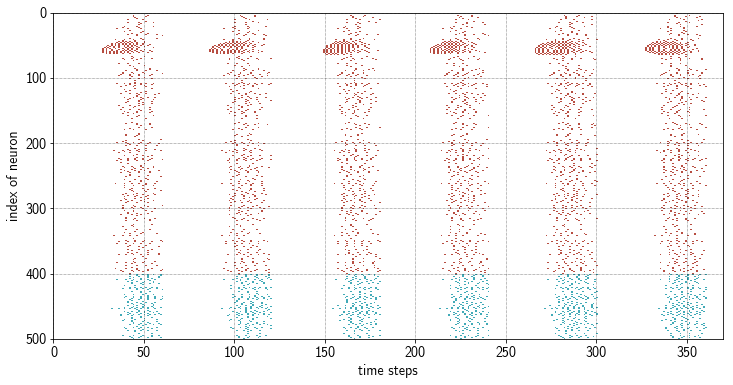

In [28]:
exp2.net.plot.reservoirSpikeTrain(figsize=(12,6), fr=0, to=370)

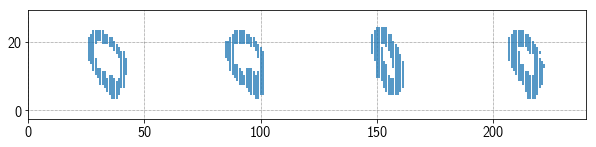

In [29]:
plt.figure(figsize=(10,2))
plt.xlim((0,240))
pl = plt.eventplot(exp2.net.inputSpikes)

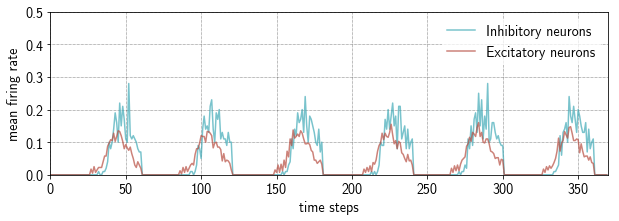

In [30]:
exp2.net.plot.reservoirRates(figsize=(10,3), fr=0, to=370)

In [31]:
# Fit on support neurons
exp2.fitRidgeClassifier()

(spikes) score: 0.985
(rates) score: 0.975
(frequency) score: 0.97


In [32]:
preditions_freq = exp2.clfFreq.predict(exp2.freqTest)
preditions_rates = exp2.clfRates.predict(exp2.ratesTest)
preditions_spikes = exp2.clfSpikes.predict(exp2.spikesTest)

In [33]:
scoreA = np.sum(preditions_freq[:nTest] == -1)/nTest
print(scoreA)
scoreB = np.sum(preditions_freq[nTest:] == 1)/nTest
print(scoreB)

0.95
0.99


In [34]:
scoreA = np.sum(preditions_rates[:nTest] == -1)/nTest
print(scoreA)
scoreB = np.sum(preditions_rates[nTest:] == 1)/nTest
print(scoreB)

0.96
0.99


In [35]:
scoreA = np.sum(preditions_spikes[:nTest] == -1)/nTest
print(scoreA)
scoreB = np.sum(preditions_spikes[nTest:] == 1)/nTest
print(scoreB)

0.98
0.99
